## Function Logic

using master_df

Choose list of predictors and choose target \
drop unnecssary columns \
Drop NaN \
Train/test/split with random state at 42 \

...........................................................

If classifier \
Train random forest classifier with default hyper parameters \
spit out classification metrics

If regressor \
Train random forest regression with default hyper parameters \
Spit out regressor metrics

...........................................................

Calculate
- Scikit learn method
- Permutation method

plot feature importances
- Scikit learn method
- Permutation method

# <span style="color:STEELBLUE">**Set Up**</span>

### Import libraries and data

In [573]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.cross_validation import ShuffleSplit

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

import math

from collections import defaultdict

In [498]:
file = "/Users/lszczyrba/Documents/Research/Projects/PR_Housing/Data/master_df_20191021.xlsx"
data = pd.read_excel(file)
df_master = pd.DataFrame(data).set_index('FIPS')

In [499]:
print(df_master.columns)

Index(['Prop_SFHA_', 'Prop_DG_Ar', 'Ave_LS_cod', 'DG_MaxDe_1', 'HurTrack_D',
       'PeakGust_1', 'MaxSusta_1', 'Count_', 'StrVI', 'SeVI', 'Str+SeVI',
       'SoVI', 'DG_mean_m', 'O_Ind', 'R_Ind', 'R_I_No0', 'R_I_NoO',
       'R_I_No0_NoO', 'cat_3q', 'cat_4q'],
      dtype='object')


### Choose Data

In [754]:
def choose_data(df_master, feature_list, target_list):
    choices = feature_list + target_list
    df = df_master[choices].copy()
    df.dropna(inplace = True)
    return df

In [755]:
# EXAMPLE:
feature_list = ['Prop_SFHA_', 'Prop_DG_Ar', 'Ave_LS_cod', 'HurTrack_D',
                'MaxSusta_1', 'StrVI', 'SeVI', 'DG_mean_m']
target_list = ['cat_3q']

df = choose_data(df_master, feature_list, target_list)

### Partition Data

In [756]:
def partition_data(df, target_str):
    y = df[target_str]
    df_x = df.drop(target_str, axis = 1)
    return y, df_x

In [757]:
# EXAMPLE:
target_str = 'cat_3q'
y, df_x = partition_data(df, target_str)

### Train, Test, Split

In [758]:
def split_the_data(df_x, y):
    x_train, x_test, y_train, y_test = train_test_split(df_x, y, 
                                                        test_size=0.2, 
                                                        random_state=42)
    return x_train, x_test, y_train, y_test


In [759]:
# Careful of Random State
# EXAMPLE:
x_train, x_test, y_train, y_test = split_the_data(df_x, y)

# <span style="color:STEELBLUE">**Run Models**</span>

### Regression Model

In [744]:
#########  eventually want to add in functionality to customize parameters based on hyperparameter tuning ######### 

def run_regression(x_train, x_test, y_train, y_test):
    reg_model = RandomForestRegressor(random_state=42, n_estimators=1000, min_samples_split=10, 
                                      max_depth = 50, max_features='sqrt', min_samples_leaf=2) 
    reg_model.fit(x_train, y_train)
    return reg_model

In [745]:
# Careful of Random State
# EXAMPLE
reg_model = run_regression(x_train, x_test, y_train, y_test)

----------------

### Classification Model

In [764]:
#########  eventually want to add in functionality to customize parameters based on hyperparameter tuning ######### 

def run_classification(x_train, x_test, y_train, y_test):
    class_model = RandomForestClassifier(random_state=42)
    class_model.fit(x_train, y_train)
    return class_model

In [765]:
# Careful of Random State
# EXAMPLE
class_model = run_classification(x_train, x_test, y_train, y_test)

# <span style="color:STEELBLUE">**Evaluate Models**</span>

### Evaluate Regression

In [746]:
def evaluate_regression(model, x_train, x_test, y_train, y_test):
    pred = model.predict(x_test)
    r_model = model.score(x_train, y_train)
    print('The training r-squared score is {}'.format(r_model))
    r = r2_score(y_test, pred)
    print('The testing r-squared score is {}'.format(r))
    mse = mean_squared_error(y_test, pred)
    print('The mean square error is {}'.format(mse))
    rmse = math.sqrt(mean_squared_error(y_test, pred))
    print('The root mean square error is {}'.format(rmse))
    errors = pred - y_test
    meanerror = np.mean(errors)
    print('The mean error is {}'.format(meanerror))
    meanabserrors = np.mean(abs(pred - y_test))
    print('The mean absolute error is {}'.format(meanabserrors))
    return pred, errors

In [747]:
# EXAMPLE
pred, errors = evaluate_regression(reg_model, x_train, x_test, y_train, y_test)

The training r-squared score is 0.600718264529567
The testing r-squared score is 0.14266532430407497
The mean square error is 0.0009032654766081324
The root mean square error is 0.030054375332189694
The mean error is 0.0012404426317087257
The mean absolute error is 0.02341378700090804


In [748]:
def analyze_errors(errors):
    error_range =  max(errors) - min(errors)
    print('The error range is {}'.format(error_range))
    error_max = max(errors)
    print('The error max is {}'.format(error_max))
    error_min = min(errors)
    print('The error min is {}'.format(error_min))

In [749]:
# EXAMPLE
analyze_errors(errors)

The error range is 0.17492632462777818
The error max is 0.06274789296009535
The error min is -0.11217843166768283


In [750]:
def plot_errors(errors):
    plt.hist(errors, 30, histtype='bar', ec='white', color='maroon')
    plt.xlabel('Error')
    plt.ylabel('Count')
    plt.title('Histogram of Model Error')
    plt.grid(True)
    plt.show()


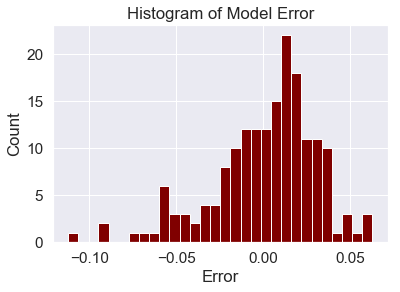

In [751]:
# EXAMPLE
plot_errors(errors)

In [752]:
######### HOW GET XLIM AND YLIM TO AUTOMATICALLY BE EQUAL W/O Manually Setting??? ######### 
######### Also want to add plain straight line across in a better way ######### 

def plot_predictions(y_test, pred):
    df_predictions = pd.DataFrame(y_test)
    df_predictions['Pred'] = pred
    X = df_predictions.iloc[:, 0].values.reshape(-1, 1)
    Y = df_predictions.iloc[:, 1].values.reshape(-1, 1)
    fig, ax = plt.subplots()
    ax.scatter(X, Y, color='maroon')
    line = mlines.Line2D([0, 1], [0, 1], color='orange')
    transform = ax.transAxes
    line.set_transform(transform)
    ax.add_line(line)    
    plt.grid(True)
    plt.xlabel("Damage Index")
    plt.ylabel("Precited Damage Index")
    plt.xlim(0, 0.2)
    plt.ylim(0, 0.2)
    plt.title('Model Evaluation')
    plt.show()

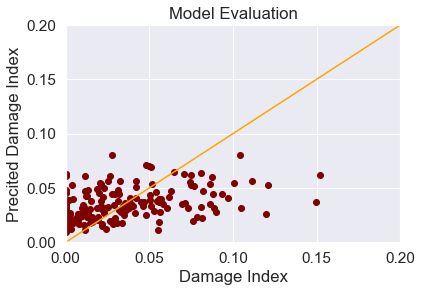

In [753]:
# EXAMPLE

plot_predictions(y_test, pred)

-----------

### Evaluate Classification

In [766]:
def evaluate_classification(model, x_train, x_test, y_train, y_test):
    pred = model.predict(x_test)
    accuracy_train = model.score(x_train, y_train)
    print('The mean training accuracy is {}'.format(accuracy_train))
    accuracy_test = model.score(x_test, y_test)
    print('The mean test accuracy is {}'.format(accuracy_test))
    df_confusion = pd.DataFrame(confusion_matrix(y_test, pred))
    print(df_confusion)
    print(classification_report(y_test, pred))
    return df_confusion

In [767]:
# EXAMPLE
df_confusion = evaluate_classification(class_model, x_train, x_test, y_train, y_test)

The mean training accuracy is 0.9843971631205674
The mean test accuracy is 0.5028248587570622
    0   1   2
0  29  10  15
1  16  25  15
2  17  15  35
             precision    recall  f1-score   support

          0       0.47      0.54      0.50        54
          1       0.50      0.45      0.47        56
          2       0.54      0.52      0.53        67

avg / total       0.50      0.50      0.50       177



In [768]:
def plot_confusion(df_confusion):
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_confusion, cmap='PuBu', annot=True, annot_kws={"size": 16})# font size
    plt.ylabel('Predicted')
    plt.xlabel('True Value')
    plt.show()

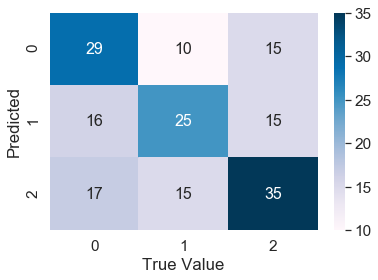

In [769]:
# EXAMPLE
plot_confusion(df_confusion)

# <span style="color:STEELBLUE">**Analyze Results**</span>

### Gini calculation and storage

In [770]:
def calc_gini_importances(x_train, model):
    importances = model.feature_importances_
    importances_df = pd.DataFrame(importances, x_train.columns,
                                  columns=['Importance']).sort_values('Importance',
                                  ascending=False)
    importances_df.reset_index(inplace=True)
    importances_df.rename(columns={'index':'Feature'}, inplace=True)
    return importances_df


In [771]:
# indicate if reg_model or class_model
# EXAMPLE
df_gini_importances = calc_gini_importances(x_train, class_model)

# Gini Plot

In [772]:

######### what is this whole fig, ax, show deal??? ######### 

def gini_importance_plot(df_gini_importances):
    df_gini_importances.sort_values('Importance', ascending=False).plot.bar('Feature',
                                                                            'Importance', 
                                                                            color='maroon', 
                                                                            legend = False)
    plt.title("Feature Importances", fontsize = 30)
    plt.ylabel('Importance')
    plt.xlabel('')
    plt.xticks(fontsize = 12, rotation = 45, ha='right')



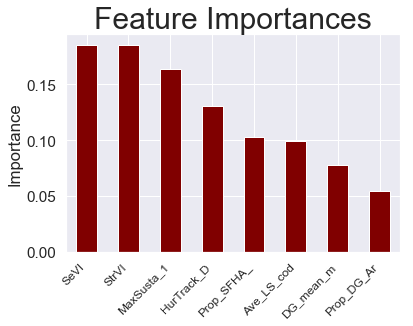

In [773]:
# EXAMPLE
gini_importance_plot(df_gini_importances)

## Permutation calculation and storage

In [774]:
def calc_permutation_importance(df_x, y):
    features = df_x.columns.values
    X = df_x.as_matrix()
    Y = y.as_matrix()
    scores = defaultdict(list)
    rf = RandomForestRegressor(random_state=42)
    for train_idx, test_idx in ShuffleSplit(len(X), 100, .3, random_state=42): #number of splits, absolute number of test samples, proportion of data in train split
        X_train, X_test = X[train_idx], X[test_idx] #Random permutation cross-validator, Yields indices to split data into training and test sets.
        Y_train, Y_test = Y[train_idx], Y[test_idx]
        r = rf.fit(X_train, Y_train)
        acc = r2_score(Y_test, rf.predict(X_test))
        for i in range(X.shape[1]): #The shape attribute for numpy arrays returns the dimensions of the array. If Y has n rows and m columns, then Y.shape is (n,m). So Y.shape[0] is n.
            X_t = X_test.copy()
            np.random.seed(42)
            np.random.shuffle(X_t[:, i]) #rearranging randomly
            shuff_acc = r2_score(Y_test, rf.predict(X_t)) 
            scores[features[i]].append((acc-shuff_acc)/acc) #change in importance, actual - shuffled/actual, this is percent error        
    mda_features = [f for f in scores.keys()]
    mda_importance = [(np.mean(score)) for score in scores.values()] #average over all the shuffled permutations
    mda_indices = np.argsort(mda_importance)
    return mda_features, mda_importance, mda_indices

In [704]:
# Careful of Random State and np.random.seed
# EXAMPLE
mda_features, mda_importance, mda_indices = calc_permutation_importance(df_x, y)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


## Permutation Plot

In [705]:
def permutation_importance_plot(mda_features, mda_importance):
    df_perm_FI = pd.DataFrame({'Feature':mda_features, 'Importance':mda_importance})
    df_perm_FI.sort_values('Importance', ascending=False).plot.bar('Feature',
                                                                   'Importance', 
                                                                    color='maroon', 
                                                                    legend = False)
    plt.title("Feature Importances", fontsize = 30)
    plt.ylabel('Importance')
    plt.xlabel('')
    plt.xticks(fontsize = 12, rotation = 45, ha='right')

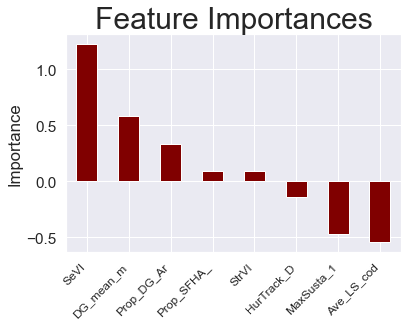

In [706]:
# EXAMPLE
permutation_importance_plot(mda_features, mda_importance)